#  Problem Statement:
### Task is to create an automated system which estimates the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

# Introduction
In this notebook, we will analyze a health insurance company's data to predict insurance premium amounts and identify factors that lead to higher healthcare costs. The insurance dataset consists of 1,338 policyholders with 7 attributes that describe their health and demographic information. The variable we would like to predict is the Premium charges, that a policyholder will have to opt for, to provide a more targeted Charges prediction.

## Domain anaysis:
●	age: age of primary beneficiary.

●	sex: beneficiary’s gender - female or male.

●	bmi: Body mass index, providing an understanding of body & weights that are relatively high/low w.r.t height. Human BMI(kg/m2) ranges are:
≤18.4 Underweight, 18.5-24.9 Normal , 25.0-39.9 Overweight, ≥40.0 Obese.
    
●	children: Number of children covered by health insurance / Number of dependents.

●	smoker: Smoking or non-smoking.

●	region: the beneficiary's residential area in the US; northeast, southeast, southwest, northwest.

●	charges: Individual medical costs billed by health insurance (to be predicted).


### Import Libraries:

In [53]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor


In [54]:
# Load  dataset
data=pd.read_csv(r"C:\Users\HYBRID SYSTEMS\Desktop\project\datasets_13720_18513_insurance(1).csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [55]:
print("There are {:,} records and {} attributes in the dataset.".format(data.shape[0], data.shape[1]))
print("There are {} missing values in the dataset.".format(data.isna().sum().sum()))
print("There are/is {} duplicate record/s in the dataset.".format(data.duplicated().sum()))

There are 1,338 records and 7 attributes in the dataset.
There are 0 missing values in the dataset.
There are/is 1 duplicate record/s in the dataset.


In [56]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Summary Statistics of Numerical Columns

In [57]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [58]:
print("Age: we have policyholder's records of age ranging from {} to {}.".format(min(data.age),max(data.age)))
print("BMI: we have policyholders who are underweight with BMI of {} and obese with BMI of {}.".format(min(data.bmi),max(data.bmi)))
print("Children: we have policyholders ranging from {} child to {} children.".format(min(data.children),max(data.children)))
print("Charges: we have minimum insurance policy charges of {}$ to maximum of {}$.".format(round(min(data.charges),2),round(max(data.charges),2)))

Age: we have policyholder's records of age ranging from 18 to 64.
BMI: we have policyholders who are underweight with BMI of 15.96 and obese with BMI of 53.13.
Children: we have policyholders ranging from 0 child to 5 children.
Charges: we have minimum insurance policy charges of 1121.87$ to maximum of 63770.43$.


### Summary Statistics of Categorical Columns

In [59]:
data.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [60]:
print("Sex: among {} records we have almost equal number of male({}%) & female({}%) policy holders.".format(len(data),round(len(data[data['sex']=='male'])/len(data)*100,2),
                                                                                                            round(len(data[data['sex']=='female'])/len(data)*100,2)))
print("                     ")
print("Smoker: among {} records we have {}% of policy holders whose smoking status is yes.".format(len(data),
                                                                                                  round(len(data[data['smoker']=='yes'])/len(data)*100,2)))
print("                     ")
print("Region: among {} regions we have equal number of policyholder accross US, but region {} stands-out to have Maximum." .format(data.region.nunique(),data.region.mode().iloc[0]))

Sex: among 1338 records we have almost equal number of male(50.52%) & female(49.48%) policy holders.
                     
Smoker: among 1338 records we have 20.48% of policy holders whose smoking status is yes.
                     
Region: among 4 regions we have equal number of policyholder accross US, but region southeast stands-out to have Maximum.


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [62]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [63]:
data.duplicated().sum()

1

In [64]:
duplicates=data[data.duplicated()]
print(duplicates)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [65]:
# records duplicated at 195 & 581 so removing record at index 581
#removing the duplicated records
data.drop_duplicates(inplace=True)

## EDA

In [66]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Univariate Analysis:

In [67]:
#Create individual subplots

Distribution_age=px.histogram(data, x='age',marginal='box',title="Distribution of Age")
Distribution_age.show()
print("                     ")
print("----------------------")
print("                     ")
print ("The distribution of ages in the dataset is almost uniform, with 40-55 customers at every age,"
      "except for ages 18 and 19 , which seem to have more than twice customers as other ages.")
print("                     ")
print("----------------------")
print("                     ")
print("                     ")
Distribution_sex=px.histogram(data, x='sex',title="Distribution of Sex",color='sex')
Distribution_sex.show()
print("                     ")
print("----------------------")
print("                     ")
print("Insight:we have almost equal number of policyholders data in the dataset.")
print("                     ")
print("----------------------")
print("                     ")
Distribution_bmi=px.histogram(data, x='bmi',marginal='box',title="Distribution of BMI")
Distribution_bmi.show()
print("                     ")
print("----------------------")
print("                     ")
print("Insight:The measurements of body mass index seem to form a Gaussian distribution centered around the value 30.")
print("Distribution have few outliers towards the right.")
print("We will not handle the outliers since the values are relevant & represent policyholders who are obese.")
print("                     ")
print("----------------------")
print("                     ")
print("                     ")
Distribution_children=px.histogram(data, x='children',title="Distribution of Children",color='children')
Distribution_children.show()
print("                     ")
print("----------------------")
print("                     ")
print("Insight:we have more number of policyholders who have 0 children & policyhoders with 4-5 children are less in the dataset.")
print("                     ")
print("----------------------")
print("                     ")
Distribution_smoker=px.histogram(data, x='smoker',title="Distribution of Smoker",color='smoker')
Distribution_smoker.show()
print("                     ")
print("----------------------")
print("                     ")
print("Insight:we have more number of policyholders who are non-smokers.")
print("                     ")
print("----------------------")
print("                     ")
Distribution_region=px.histogram(data, x='region',title="Distribution of Region",color='region')
Distribution_region.show()
print("                     ")
print("----------------------")
print("                     ")
print("Insight:we have almost equal number of policyholders from all the 4 regions of the country US.")
print("                     ")
print("----------------------")
print("                     ")
Distribution_charges=px.histogram(data, x='charges',marginal='box',title="Distribution of Charges")
Distribution_charges.show()
print("                     ")
print("----------------------")
print("                     ")
print("Insight:we have more concentration(~50%) of policyholders who have insuarance charges ranging from 2k-14k.")
print("                     ")
print("----------------------")

                     
----------------------
                     
The distribution of ages in the dataset is almost uniform, with 40-55 customers at every age,except for ages 18 and 19 , which seem to have more than twice customers as other ages.
                     
----------------------
                     
                     


                     
----------------------
                     
Insight:we have almost equal number of policyholders data in the dataset.
                     
----------------------
                     


                     
----------------------
                     
Insight:The measurements of body mass index seem to form a Gaussian distribution centered around the value 30.
Distribution have few outliers towards the right.
We will not handle the outliers since the values are relevant & represent policyholders who are obese.
                     
----------------------
                     
                     


                     
----------------------
                     
Insight:we have more number of policyholders who have 0 children & policyhoders with 4-5 children are less in the dataset.
                     
----------------------
                     


                     
----------------------
                     
Insight:we have more number of policyholders who are non-smokers.
                     
----------------------
                     


                     
----------------------
                     
Insight:we have almost equal number of policyholders from all the 4 regions of the country US.
                     
----------------------
                     


                     
----------------------
                     
Insight:we have more concentration(~50%) of policyholders who have insuarance charges ranging from 2k-14k.
                     
----------------------


#### Note: Graph insights are given below individual graphs.

### Bi-variate analysis:

Understanding the correlation b/w individual input variables(X) w.r.t target or output variable(Y).

In [68]:
# calculate correlation directly for Numerical columns
age_charges= round(data.charges.corr(data.age),3)
bmi_charges= round(data.charges.corr(data.bmi),3)
children_charges= round(data.charges.corr(data.children),3)
# encode categorical columns then calculate correlation
smoking = data.smoker.map({'no':0,'yes':1})
smoking_charges= round(data.charges.corr(smoking),3)
gender = data.sex.map({'female':0, 'male':1})
gender_charges= round(data.charges.corr(gender),3)
zone=data.region.map({'southwest':0, 'southeast':3, 'northwest':2, 'northeast':1})
region_charges= round(data.charges.corr(zone),3)

In [69]:
# create a dataframe of correlation values to understand & compare
Corr=[['age_charges',age_charges],['bmi_charges',bmi_charges],['children_charges',children_charges],
      ['smoking_charges',smoking_charges],['gender_charges',gender_charges],['region_charges',region_charges]]

df_Corr=pd.DataFrame(Corr,columns=['input v/s target','Correlation'])
df_Corr.sort_values('Correlation',ascending=True,inplace=True)
print(df_Corr)
print("                                ")
print("---------------------------------")
print("                                ")
print("From above table it is clear that correlation between Smoking status & Insurance charges is high({}) compared to other input variables."
        .format(df_Corr['Correlation'].max()))

   input v/s target  Correlation
4    gender_charges        0.058
5    region_charges        0.060
2  children_charges        0.067
1       bmi_charges        0.198
0       age_charges        0.298
3   smoking_charges        0.787
                                
---------------------------------
                                
From above table it is clear that correlation between Smoking status & Insurance charges is high(0.787) compared to other input variables.


In [70]:
fig1=px.scatter(data,x='age',y='charges',color='smoker',size='charges',title="Age v/s Insurance Charges w.r.t Smoking status")
fig1.show()
print("                                ")
print("---------------------------------")
print("Insight: (Linear relation)Insurance charges increase as age increases; also charges are high if the person is smoker.")
print("                                ")
print("---------------------------------")
print("                                ")
print("                                ")
fig2=px.scatter(data,x='bmi',y='charges',color='smoker',size='charges',title="BMI v/s Insurance Charges w.r.t Smoking status.")
fig2.show()
print("                                ")
print("---------------------------------")
print("Insight: (less Linear); If a person is smoker & having high BMI then the insurance cost is relatively high.")
print("                                ")
print("---------------------------------")
print("                                ")
print("                                ")
fig3=px.scatter(data,x='children',y='charges',color='smoker',size='charges',title="No. of Children v/s Insurance Charges w.r.t Smoking status")
fig3.show()
print("                                ")
print("---------------------------------")
print("                                ")
print("Insight: There are more policyholders with no or 0 children compared to policy holders with 4-5 children.")
print("The insurance charges increases if the policyholder is a smoker.")

                                
---------------------------------
Insight: (Linear relation)Insurance charges increase as age increases; also charges are high if the person is smoker.
                                
---------------------------------
                                
                                


                                
---------------------------------
Insight: (less Linear); If a person is smoker & having high BMI then the insurance cost is relatively high.
                                
---------------------------------
                                
                                


                                
---------------------------------
                                
Insight: There are more policyholders with no or 0 children compared to policy holders with 4-5 children.
The insurance charges increases if the policyholder is a smoker.


#### Note: Graph insights are given below individual graphs.

## Encoding

In [71]:
# One Hot Encoding
df_smoker=pd.get_dummies(data['smoker'],drop_first=True,prefix='smoker')
data = pd.concat([data,df_smoker],axis=1).drop("smoker",axis=1)

In [72]:
# One Hot Encoding
df_sex=pd.get_dummies(data['sex'],drop_first=True,prefix='sex')
data = pd.concat([data,df_sex],axis=1).drop("sex",axis=1)

In [73]:
# Frequency Encoding
data.region.value_counts().sort_values()

northwest    324
northeast    324
southwest    325
southeast    364
Name: region, dtype: int64

In [74]:
data.loc[data['region']=='northeast','region']=0
data.loc[data['region']=='southwest','region']=1
data.loc[data['region']=='northwest','region']=2
data.loc[data['region']=='southeast','region']=3

In [75]:
# move the target column to end in the dataset
arrange_col=list(data.columns)
target= 'charges'
arrange_col.remove(target)
arrange_col.append(target)
data=data[arrange_col]

data.head()

,age,bmi,children,region,smoker_yes,sex_male,charges
0,19,27.900,0,1,1,0,16884.92400
1,18,33.770,1,3,0,1,1725.55230
2,28,33.000,3,3,0,1,4449.46200
3,33,22.705,0,2,0,1,21984.47061
4,32,28.880,0,2,0,1,3866.85520


## Feature engineering / feature selection

Correlation between input variables
----------------------
                     


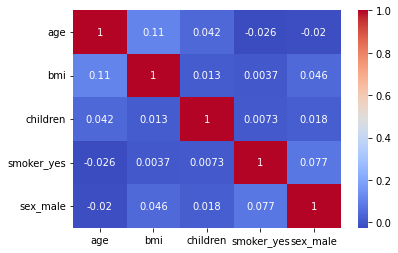

In [76]:
sns.heatmap(data.drop('charges',axis=1).corr(),annot=True,cmap='coolwarm')
print ("Correlation between input variables")
print("----------------------")
print("                     ")

#### Insight: There are no high correlation between input variable

## Model Building:

In [77]:
X=data.drop('charges',axis=1)
Y=data['charges']

In [78]:
#finding the best random state number (manual method):
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(30,60):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
    lrmodel=LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs=(cross_val_score(lrmodel,X,Y,cv=5)).mean()
    l3.append(cvs)
    df1=pd.DataFrame({'train r2_score':l1,'test r2_score':l2,'cvs':l3})

df1.head()

,train r2_score,test r2_score,cvs
0,0.751185,0.742989,0.746655
1,0.751882,0.738087,0.746655
2,0.739231,0.791889,0.746655
3,0.752733,0.736251,0.746655
4,0.758297,0.718286,0.746655


In [79]:
print('Best random_state number for the dataset is: %.0f , Corresponding test_data r2_score: %.3f' %
      (df1['test r2_score'].argmax()+30, df1['test r2_score'].max()))

Best random_state number for the dataset is: 42 , Corresponding test_data r2_score: 0.805


In [80]:
#best train test data selection & split;
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

#### Standardization of input variables:
we understand that correlation between smoking status & target(charges) is high & BMI numerical value is high compared to boolean values of smoking status column, so to avoid bias towards BMI values, we will normalize the input variables.

In [81]:
std_scaler=StandardScaler()
scaled_Xtrain=std_scaler.fit_transform(Xtrain)
scaled_Xtest=std_scaler.transform(Xtest)

## Linear regression:

In [82]:
LR=LinearRegression()
LR.fit(scaled_Xtrain,Ytrain)

LinearRegression()

In [83]:
# predict train & test target values
LR_Ytrain_pred= LR.predict(scaled_Xtrain)
LR_Ytest_pred= LR.predict(scaled_Xtest)

LR_train_r2score= round(r2_score(Ytrain,LR_Ytrain_pred),4)
LR_test_r2score= round(r2_score(Ytest,LR_Ytest_pred),4)
LR_train_MAE= round(mean_absolute_error(Ytrain,LR_Ytrain_pred),4)
LR_test_MAE= round(mean_absolute_error(Ytest,LR_Ytest_pred),4)
LR_train_MSE= round(mean_squared_error(Ytrain,LR_Ytrain_pred),4)
LR_test_MSE= round(mean_squared_error(Ytest,LR_Ytest_pred),4)
LR_train_RMSE= round(np.sqrt(mean_squared_error(Ytrain,LR_Ytrain_pred)),4)
LR_test_RMSE= round(np.sqrt(mean_squared_error(Ytest,LR_Ytest_pred)),4)

print('LR_train_r2score: %.3f ,                LR_test_r2score: %.3f' %
      (LR_train_r2score, LR_test_r2score))
print('LR_train_MAE: %.3f ,                 LR_test_MAE: %.3f' %
      (LR_train_MAE, LR_test_MAE))
print('LR_train_MSE: %.3f ,             LR_test_MSE: %.3f' %
      (LR_train_MSE, LR_test_MSE))
print('LR_train_RMSE: %.3f ,                LR_test_RMSE: %.3f' %
      (LR_train_RMSE, LR_test_RMSE))

LR_train_r2score: 0.730 ,                LR_test_r2score: 0.805
LR_train_MAE: 4183.930 ,                 LR_test_MAE: 4192.243
LR_train_MSE: 37015290.198 ,             LR_test_MSE: 35769574.543
LR_train_RMSE: 6084.019 ,                LR_test_RMSE: 5980.767


Model performace is good in both training & testing. Model is not overfitting.

## SVM: Support Vector Regressor with default parameters:
kernel = "rbf", degree= 3, gamma="scale", coef0= 0, tol= 0.001, C= 1, epsilon= 0.1, shrinking= True, cache_size= 200, verbose= False, max_iter= -1

In [84]:
SVR=SVR()
SVR.fit(scaled_Xtrain,Ytrain)

SVR()

In [85]:
SVR_Ytrain_pred=SVR.predict(scaled_Xtrain)
SVR_Ytest_pred=SVR.predict(scaled_Xtest)

SVR_train_r2score=round(r2_score(Ytrain,SVR_Ytrain_pred),4)
SVR_test_r2score=round(r2_score(Ytest,SVR_Ytest_pred),4)
SVR_train_MAE=round(mean_absolute_error(Ytrain,SVR_Ytrain_pred),4)
SVR_test_MAE=round(mean_absolute_error(Ytest,SVR_Ytest_pred),4)
SVR_train_MSE=round(mean_squared_error(Ytrain,SVR_Ytrain_pred),4)
SVR_test_MSE=round(mean_squared_error(Ytest,SVR_Ytest_pred),4)
SVR_train_RMSE=round(np.sqrt(mean_squared_error(Ytrain,SVR_Ytrain_pred)),4)
SVR_test_RMSE=round(np.sqrt(mean_squared_error(Ytest,SVR_Ytest_pred)),4)

print('SVR_train_r2score: %.3f ,              SVR_test_r2score: %.3f' %
      (SVR_train_r2score, SVR_test_r2score))
print('SVR_train_MAE: %.3f ,                SVR_test_MAE: %.3f' %
      (SVR_train_MAE, SVR_test_MAE))
print('SVR_train_MSE: %.3f ,           SVR_test_MSE: %.3f' %
      (SVR_train_MSE, SVR_test_MSE))
print('SVR_train_RMSE: %.3f ,              SVR_test_RMSE: %.3f' %
      (SVR_train_RMSE, SVR_test_RMSE))

SVR_train_r2score: -0.097 ,              SVR_test_r2score: -0.130
SVR_train_MAE: 8075.841 ,                SVR_test_MAE: 9253.290
SVR_train_MSE: 150156220.125 ,           SVR_test_MSE: 207664353.621
SVR_train_RMSE: 12253.825 ,              SVR_test_RMSE: 14410.564


Model performace with default parameters is very poor in both training & testing. Hyperparameter tuning required.

### Support Vector Regressor Hyperparameter Tuning using RandomizedSearchCV:

In [86]:
param_grid1={'C':np.logspace(1,3,12), # Regularization parameter
            'kernel':['linear'], # Kernel function type
            'gamma':np.logspace(1,3,12), # Kernel coefficient (for rbf and poly)
            'epsilon':np.linspace(0.1,3,12)} # Tolerance for loss function

SVR_random_search=RandomizedSearchCV(estimator=SVR,
                                    param_distributions=param_grid1,
                                    scoring=r2_score,
                                    cv=5, # Use 5-fold cross-validation
                                    verbose=2, # Verbosity level (0-silent, 2-full output)
                                    n_iter=600,
                                    n_jobs=-1
                                    )

SVR_random_search.fit(scaled_Xtrain,Ytrain)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=600, n_jobs=-1,
                   param_distributions={'C': array([  10.        ,   15.19911083,   23.101297  ,   35.11191734,
         53.36699231,   81.11308308,  123.28467394,  187.38174229,
        284.80358684,  432.87612811,  657.93322466, 1000.        ]),
                                        'epsilon': array([0.1       , 0.36363636, 0.62727273, 0.89090909, 1.15454545,
       1.41818182, 1.68181818, 1.94545455, 2.20909091, 2.47272727,
       2.73636364, 3.        ]),
                                        'gamma': array([  10.        ,   15.19911083,   23.101297  ,   35.11191734,
         53.36699231,   81.11308308,  123.28467394,  187.38174229,
        284.80358684,  432.87612811,  657.93322466, 1000.        ]),
                                        'kernel': ['linear']},
                   scoring=<function r2_score at 0x000002426B95E280>,
                   verbose=2)

In [87]:
print(SVR_random_search.best_params_)

{'kernel': 'linear', 'gamma': 10.0, 'epsilon': 3.0, 'C': 53.3669923120631}


In [88]:
SVRbest=SVR_random_search.best_estimator_
SVRbest.fit(scaled_Xtrain,Ytrain)

SVR(C=53.3669923120631, epsilon=3.0, gamma=10.0, kernel='linear')

In [89]:
SVRbest_Ytrain_pred=SVRbest.predict(scaled_Xtrain)
SVRbest_Ytest_pred=SVRbest.predict(scaled_Xtest)

SVRbest_train_r2score= round(r2_score(Ytrain,SVRbest_Ytrain_pred),4)
SVRbest_test_r2score= round(r2_score(Ytest,SVRbest_Ytest_pred),4)
SVRbest_train_MAE= round(mean_absolute_error(Ytrain,SVRbest_Ytrain_pred),4)
SVRbest_test_MAE= round(mean_absolute_error(Ytest,SVRbest_Ytest_pred),4)
SVRbest_train_MSE= round(mean_squared_error(Ytrain,SVRbest_Ytrain_pred),4)
SVRbest_test_MSE= round(mean_squared_error(Ytest,SVRbest_Ytest_pred),4)
SVRbest_train_RMSE= round(np.sqrt(mean_squared_error(Ytrain,SVRbest_Ytrain_pred)),4)
SVRbest_test_RMSE= round(np.sqrt(mean_squared_error(Ytest,SVRbest_Ytest_pred)),4)

print('SVRbest_train_r2score: %.3f ,             SVRbest_test_r2score: %.3f' %
      (SVRbest_train_r2score, SVRbest_test_r2score))
print('SVRbest_train_MAE: %.3f ,              SVRbest_test_MAE: %.3f' %
      (SVRbest_train_MAE, SVRbest_test_MAE))
print('SVRbest_train_MSE: %.3f ,          SVRbest_test_MSE: %.3f' %
      (SVRbest_train_MSE, SVRbest_test_MSE))
print('SVRbest_train_RMSE: %.3f ,             SVRbest_test_RMSE: %.3f' %
      (SVRbest_train_RMSE, SVRbest_test_RMSE))

SVRbest_train_r2score: 0.580 ,             SVRbest_test_r2score: 0.597
SVRbest_train_MAE: 3620.066 ,              SVRbest_test_MAE: 4255.218
SVRbest_train_MSE: 57461466.212 ,          SVRbest_test_MSE: 74109360.557
SVRbest_train_RMSE: 7580.334 ,             SVRbest_test_RMSE: 8608.679


Model performace is good in both training & testing. Model is not overfitting.
Current parameters:
'kernel': 'linear', 'gamma': 1000.0, 'epsilon': 0.6272727272727272, 'C': 1000.0

### Support Vector Regressor Hyperparameter Tuning using GridSearchCV:

In [90]:
param_grid11={'C':np.logspace(1,3,12), # Regularization parameter
            'kernel':['linear'], # Kernel function type
            'gamma':np.logspace(1,3,12),
            'epsilon':np.linspace(0.1,3,12)} # Tolerance for loss function

SVR_grid_search=GridSearchCV(estimator=SVR,
                                    param_grid=param_grid11,
                                    scoring=r2_score,
                                    cv=5, # Use 5-fold cross-validation
                                    verbose=2, # Verbosity level (0-silent, 2-full output)
                                    n_jobs=-1)

SVR_grid_search.fit(scaled_Xtrain,Ytrain)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': array([  10.        ,   15.19911083,   23.101297  ,   35.11191734,
         53.36699231,   81.11308308,  123.28467394,  187.38174229,
        284.80358684,  432.87612811,  657.93322466, 1000.        ]),
                         'epsilon': array([0.1       , 0.36363636, 0.62727273, 0.89090909, 1.15454545,
       1.41818182, 1.68181818, 1.94545455, 2.20909091, 2.47272727,
       2.73636364, 3.        ]),
                         'gamma': array([  10.        ,   15.19911083,   23.101297  ,   35.11191734,
         53.36699231,   81.11308308,  123.28467394,  187.38174229,
        284.80358684,  432.87612811,  657.93322466, 1000.        ]),
                         'kernel': ['linear']},
             scoring=<function r2_score at 0x000002426B95E280>, verbose=2)

In [95]:
print(SVR_grid_search.best_params_)

{'C': 10.0, 'epsilon': 0.1, 'gamma': 10.0, 'kernel': 'linear'}


In [99]:
SVRgrid=SVR(kernel= 'linear', gamma= 700, epsilon= 0.3, C =700)
SVRgrid.fit(scaled_Xtrain,Ytrain)

TypeError: 'SVR' object is not callable

In [100]:
SVRgrid_Ytrain_pred=SVRgrid.predict(scaled_Xtrain)
SVRgrid_Ytest_pred=SVRgrid.predict(scaled_Xtest)

SVRgrid_train_r2score=round(r2_score(Ytrain,SVRgrid_Ytrain_pred),4)
SVRgrid_test_r2score=round(r2_score(Ytest,SVRgrid_Ytest_pred),4)
SVRgrid_train_MAE=round(mean_absolute_error(Ytrain,SVRgrid_Ytrain_pred),4)
SVRgrid_test_MAE=round(mean_absolute_error(Ytest,SVRgrid_Ytest_pred),4)
SVRgrid_train_MSE=round(mean_squared_error(Ytrain,SVRgrid_Ytrain_pred),4)
SVRgrid_test_MSE=round(mean_squared_error(Ytest,SVRgrid_Ytest_pred),4)
SVRgrid_train_RMSE=round(np.sqrt(mean_squared_error(Ytrain,SVRgrid_Ytrain_pred)),4)
SVRgrid_test_RMSE=round(np.sqrt(mean_squared_error(Ytest,SVRgrid_Ytest_pred)),4)

print('SVRgrid_train_r2score: %.3f ,             SVRgrid_test_r2score: %.3f' %
      (SVRgrid_train_r2score, SVRgrid_test_r2score))
print('SVRgrid_train_MAE: %.3f ,              SVRgrid_test_MAE: %.3f' %
      (SVRgrid_train_MAE, SVRgrid_test_MAE))
print('SVRgrid_train_MSE: %.3f ,          SVRgrid_test_MSE: %.3f' %
      (SVRgrid_train_MSE, SVRgrid_test_MSE))
print('SVRgrid_train_RMSE: %.3f ,             SVRgrid_test_RMSE: %.3f' %
      (SVRgrid_train_RMSE, SVRgrid_test_RMSE))

NameError: name 'SVRgrid' is not defined

Model performace is below average in both training & testing. Need to change the paramters or change the best parameter extraction technique.

Current parameters:
'C': 10.0, 'epsilon': 0.1, 'gamma': 10.0, 'kernel': 'linear'

## Random Forest Regressor  with default parameters:
n_estimators= 100, criterion= "squared_error", max_depth= None, min_samples_split= 2, min_samples_leaf= 1, min_weight_fraction_leaf= 0, max_features= 1, max_leaf_nodes= None, min_impurity_decrease= 0, bootstrap= True, oob_score= False, n_jobs= None, random_state= None, verbose= 0, warm_start= False, ccp_alpha= 0, max_samples= None

In [101]:
RFR=RandomForestRegressor() #default n_estimators=100
RFR.fit(scaled_Xtrain,Ytrain)

RandomForestRegressor()

In [102]:
RFR_Ytrain_pred=RFR.predict(scaled_Xtrain)
RFR_Ytest_pred=RFR.predict(scaled_Xtest)

RFR_train_r2score=round(r2_score(Ytrain,RFR_Ytrain_pred),4)
RFR_test_r2score=round(r2_score(Ytest,RFR_Ytest_pred),4)
RFR_train_MAE=round(mean_absolute_error(Ytrain,RFR_Ytrain_pred),4)
RFR_test_MAE=round(mean_absolute_error(Ytest,RFR_Ytest_pred),4)
RFR_train_MSE=round(mean_squared_error(Ytrain,RFR_Ytrain_pred),4)
RFR_test_MSE=round(mean_squared_error(Ytest,RFR_Ytest_pred),4)
RFR_train_RMSE=round(np.sqrt(mean_squared_error(Ytrain,RFR_Ytrain_pred)),4)
RFR_test_RMSE=round(np.sqrt(mean_squared_error(Ytest,RFR_Ytest_pred)),4)

print('RFR_train_r2score: %.3f ,             RFR_test_r2score: %.3f' %
      (RFR_train_r2score, RFR_test_r2score))
print('RFR_train_MAE: %.3f ,              RFR_test_MAE: %.3f' %
      (RFR_train_MAE, RFR_test_MAE))
print('RFR_train_MSE: %.3f ,           RFR_test_MSE: %.3f' %
      (RFR_train_MSE, RFR_test_MSE))
print('RFR_train_RMSE: %.3f ,             RFR_test_RMSE: %.3f' %
      (RFR_train_RMSE, RFR_test_RMSE))

RFR_train_r2score: 0.974 ,             RFR_test_r2score: 0.877
RFR_train_MAE: 1034.478 ,              RFR_test_MAE: 2667.434
RFR_train_MSE: 3545375.171 ,           RFR_test_MSE: 22580320.716
RFR_train_RMSE: 1882.917 ,             RFR_test_RMSE: 4751.876


Model performace is better in testing. But Model is overfitting.
Need Hyperparameter tuning to reduce overfitting & improve overall performance.

#### RandomForestRegressor Hyperparameter Tuning using RandomizedSearchCV:

In [103]:
param_grid2={'n_estimators':np.round(np.linspace(50,600,12)).astype(int),
           'max_depth': [3,4,5,6,7],
           'min_samples_split': [2,3,4,5,7],
           'min_samples_leaf': [1,2,3,4,5],
           'max_features': ['auto', 'sqrt', 'log2']}
RFRrandom_search=RandomizedSearchCV(estimator=RFR,param_distributions=param_grid2,scoring=r2_score,
                           cv=5,verbose=2,n_iter=300,n_jobs=-1)
RFRrandom_search.fit(scaled_Xtrain,Ytrain)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 7],
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600])},
                   scoring=<function r2_score at 0x000002426B95E280>,
                   verbose=2)

In [104]:
print(RFRrandom_search.best_params_)

{'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 4}


In [105]:
RFRbest=RandomForestRegressor(max_depth=5, max_features='auto', min_samples_leaf=4,min_samples_split=3, n_estimators=600)
RFRbest.fit(scaled_Xtrain,Ytrain)

RandomForestRegressor(max_depth=5, max_features='auto', min_samples_leaf=4,
                      min_samples_split=3, n_estimators=600)

In [106]:
RFRbest_Ytrain_pred=RFRbest.predict(scaled_Xtrain)
RFRbest_Ytest_pred=RFRbest.predict(scaled_Xtest)

RFRbest_train_r2score= round(r2_score(Ytrain,RFRbest_Ytrain_pred),4)
RFRbest_test_r2score= round(r2_score(Ytest,RFRbest_Ytest_pred),4)
RFRbest_train_MAE= round(mean_absolute_error(Ytrain,RFRbest_Ytrain_pred),4)
RFRbest_test_MAE= round(mean_absolute_error(Ytest,RFRbest_Ytest_pred),4)
RFRbest_train_MSE= round(mean_squared_error(Ytrain,RFRbest_Ytrain_pred),4)
RFRbest_test_MSE= round(mean_squared_error(Ytest,RFRbest_Ytest_pred),4)
RFRbest_train_RMSE= round(np.sqrt(mean_squared_error(Ytrain,RFRbest_Ytrain_pred)),4)
RFRbest_test_RMSE= round(np.sqrt(mean_squared_error(Ytest,RFRbest_Ytest_pred)),4)

print('RFRbest_train_r2score: %.3f ,            RFRbest_test_r2score: %.3f' %
      (RFRbest_train_r2score, RFRbest_test_r2score))
print('RFRbest_train_MAE: %.3f ,             RFRbest_test_MAE: %.3f' %
      (RFRbest_train_MAE, RFRbest_test_MAE))
print('RFRbest_train_MSE: %.3f ,         RFRbest_test_MSE: %.3f' %
      (RFRbest_train_MSE, RFRbest_test_MSE))
print('RFRbest_train_RMSE: %.3f ,            RFRbest_test_RMSE: %.3f' %
      (RFRbest_train_RMSE, RFRbest_test_RMSE))

RFRbest_train_r2score: 0.875 ,            RFRbest_test_r2score: 0.904
RFRbest_train_MAE: 2274.224 ,             RFRbest_test_MAE: 2407.716
RFRbest_train_MSE: 17176391.102 ,         RFRbest_test_MSE: 17714451.675
RFRbest_train_RMSE: 4144.441 ,            RFRbest_test_RMSE: 4208.854


Model performace is better in both training & testing. Model is not overfitting.

Current parameters:
'n_estimators': 600, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 5

#### Gradient Boosting Regressor with default parameters:
loss= "squared_error", learning_rate=0.1, n_estimators= 100, subsample= 1, criterion= "friedman_mse", min_samples_split= 2, min_samples_leaf= 1, min_weight_fraction_leaf= 0, max_depth= 3, min_impurity_decrease= 0, random_state= None, max_features= None, alpha= 0.9, verbose= 0, max_leaf_nodes= None, warm_start= False, validation_fraction= 0.1, n_iter_no_change= None, tol= 0.0001, ccp_alpha= 0

In [107]:
GBR=GradientBoostingRegressor()
GBR.fit(scaled_Xtrain,Ytrain)

GradientBoostingRegressor()

In [108]:
GBR_Ytrain_pred=GBR.predict(scaled_Xtrain)
GBR_Ytest_pred=GBR.predict(scaled_Xtest)

GBR_train_r2score= round(r2_score(Ytrain,GBR_Ytrain_pred),4)
GBR_test_r2score= round(r2_score(Ytest,GBR_Ytest_pred),4)
GBR_train_MAE= round(mean_absolute_error(Ytrain,GBR_Ytrain_pred),4)
GBR_test_MAE= round(mean_absolute_error(Ytest,GBR_Ytest_pred),4)
GBR_train_MSE= round(mean_squared_error(Ytrain,GBR_Ytrain_pred),4)
GBR_test_MSE= round(mean_squared_error(Ytest,GBR_Ytest_pred),4)
GBR_train_RMSE= round(np.sqrt(mean_squared_error(Ytrain,GBR_Ytrain_pred)),4)
GBR_test_RMSE= round(np.sqrt(mean_squared_error(Ytest,GBR_Ytest_pred)),4)

print('GBR_train_r2score: %.3f ,            GBR_test_r2score: %.3f' %
      (GBR_train_r2score,GBR_test_r2score))
print('GBR_train_MAE: %.3f ,             GBR_test_MAE: %.3f' %
      (GBR_train_MAE,GBR_test_MAE))
print('GBR_train_MSE: %.3f ,         GBR_test_MSE: %.3f' %
      (GBR_train_MSE,GBR_test_MSE))
print('GBR_train_RMSE: %.3f ,            GBR_test_RMSE: %.3f' %
      (GBR_train_RMSE,GBR_test_RMSE))

GBR_train_r2score: 0.895 ,            GBR_test_r2score: 0.902
GBR_train_MAE: 2077.481 ,             GBR_test_MAE: 2504.870
GBR_train_MSE: 14327409.432 ,         GBR_test_MSE: 17952949.610
GBR_train_RMSE: 3785.157 ,            GBR_test_RMSE: 4237.092


Model performace is best in both training & testing. Model is not overfitting.

#### Gradient Boosting Regressor Hyperparameter Tuning using RandomizedSearchCV:

In [109]:
param_grid3={'n_estimators':np.round(np.linspace(50,600,12)).astype(int),
           'learning_rate':np.linspace(0.05,0.4,8),
           'max_depth':[3,4,5,6,7],
           'min_samples_split':[2,3,4,5,6],
           'min_samples_leaf':[1,2,3,4,5]}
GBRrandom_search=RandomizedSearchCV(estimator=GBR,param_distributions=param_grid3,cv=5,
                         scoring=r2_score,n_iter=300,verbose=2,n_jobs=-1)
GBRrandom_search.fit(scaled_Xtrain,Ytrain)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600])},
                   scoring=<function r2_score at 0x000002426B95E280>,
                   verbose=2)

In [110]:
print(GBRrandom_search.best_params_)

{'n_estimators': 350, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.15000000000000002}


In [111]:
GBRbest=GBRrandom_search.best_estimator_
GBRbest.fit(scaled_Xtrain,Ytrain)

GradientBoostingRegressor(learning_rate=0.15000000000000002, min_samples_leaf=4,
                          min_samples_split=6, n_estimators=350)

In [112]:
GBRbest_Ytrain_pred=GBRbest.predict(scaled_Xtrain)
GBRbest_Ytest_pred=GBRbest.predict(scaled_Xtest)

GBRbest_train_r2score= round(r2_score(Ytrain,GBRbest_Ytrain_pred),4)
GBRbest_test_r2score= round(r2_score(Ytest,GBRbest_Ytest_pred),4)
GBRbest_train_MAE= round(mean_absolute_error(Ytrain,GBRbest_Ytrain_pred),4)
GBRbest_test_MAE= round(mean_absolute_error(Ytest,GBRbest_Ytest_pred),4)
GBRbest_train_MSE= round(mean_squared_error(Ytrain,GBRbest_Ytrain_pred),4)
GBRbest_test_MSE= round(mean_squared_error(Ytest,GBRbest_Ytest_pred),4)
GBRbest_train_RMSE= round(np.sqrt(mean_squared_error(Ytrain,GBRbest_Ytrain_pred)),4)
GBRbest_test_RMSE= round(np.sqrt(mean_squared_error(Ytest,GBRbest_Ytest_pred)),4)

print('GBRbest_train_r2score: %.3f ,            GBRbest_test_r2score: %.3f' %
      (GBRbest_train_r2score,GBRbest_test_r2score))
print('GBRbest_train_MAE: %.3f ,             GBRbest_test_MAE: %.3f' %
      (GBRbest_train_MAE,GBRbest_test_MAE))
print('GBRbest_train_MSE: %.3f ,         GBRbest_test_MSE: %.3f' %
      (GBRbest_train_MSE,GBRbest_test_MSE))
print('GBRbest_train_RMSE: %.3f ,            GBRbest_test_RMSE: %.3f' %
      (GBRbest_train_RMSE,GBRbest_test_RMSE))

GBRbest_train_r2score: 0.935 ,            GBRbest_test_r2score: 0.882
GBRbest_train_MAE: 1711.711 ,             GBRbest_test_MAE: 2892.287
GBRbest_train_MSE: 8884709.405 ,         GBRbest_test_MSE: 21678840.375
GBRbest_train_RMSE: 2980.723 ,            GBRbest_test_RMSE: 4656.054


Model performace is better in testing but in training it is shifting towards overfitting. Need to re-run randomsearch CV.

Best parameters:
'n_estimators': 600, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.15000000000000002

#### Extreme Gradient Boosting Regressor with default parameters:


In [113]:
XGBR=XGBRegressor()
XGBR.fit(scaled_Xtrain,Ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [114]:
XGBR_Ytrain_pred=XGBR.predict(scaled_Xtrain)
XGBR_Ytest_pred=XGBR.predict(scaled_Xtest)

XGBR_train_r2score= round(r2_score(Ytrain,XGBR_Ytrain_pred),4)
XGBR_test_r2score= round(r2_score(Ytest,XGBR_Ytest_pred),4)
XGBR_train_MAE= round(mean_absolute_error(Ytrain,XGBR_Ytrain_pred),4)
XGBR_test_MAE= round(mean_absolute_error(Ytest,XGBR_Ytest_pred),4)
XGBR_train_MSE= round(mean_squared_error(Ytrain,XGBR_Ytrain_pred),4)
XGBR_test_MSE= round(mean_squared_error(Ytest,XGBR_Ytest_pred),4)
XGBR_train_RMSE= round(np.sqrt(mean_squared_error(Ytrain,XGBR_Ytrain_pred)),4)
XGBR_test_RMSE= round(np.sqrt(mean_squared_error(Ytest,XGBR_Ytest_pred)),4)

print('XGBR_train_r2score: %.3f ,           XGBR_test_r2score: %.3f' %
      (XGBR_train_r2score,XGBR_test_r2score))
print('XGBR_train_MAE: %.3f ,             XGBR_test_MAE: %.3f' %
      (XGBR_train_MAE,GBRbest_test_MAE))
print('XGBR_train_MSE: %.3f ,          XGBR_test_MSE: %.3f' %
      (XGBR_train_MSE,XGBR_test_MSE))
print('XGBR_train_RMSE: %.3f ,            XGBR_test_RMSE: %.3f' %
      (XGBR_train_RMSE,XGBR_test_RMSE))

XGBR_train_r2score: 0.995 ,           XGBR_test_r2score: 0.871
XGBR_train_MAE: 476.998 ,             XGBR_test_MAE: 2892.287
XGBR_train_MSE: 703337.543 ,          XGBR_test_MSE: 23747394.240
XGBR_train_RMSE: 838.652 ,            XGBR_test_RMSE: 4873.130


Model performace is better in testing. But Model is overfitting.
Need Hyperparameter tuning to reduce overfitting & improve overall performance.

#### Hyperparameter Tuning of Extreme Gradient Boosting Regressor using  RandomizedSearchCV

In [115]:
param_grid4={'n_estimators':np.round(np.linspace(50,600,12)).astype(int),
           'learning_rate':np.linspace(0.05,0.4,8),
           'max_depth':[3,4,5,6,7],
           'gamma':np.round(np.logspace(1,3,12)).astype(int),
           'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
           'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}
XGBRrandom_search=RandomizedSearchCV(estimator=XGBR,param_distributions=param_grid4,cv=5,
                         scoring=r2_score,n_iter=300,verbose=2,n_jobs=-1)
XGBRrandom_search.fit(scaled_Xtrain,Ytrain)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...
                                        'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]),
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4,
                                                       200]},
                   scoring=<function r2_score at 0x000002426B95E280>,
                   verbose=2)

In [116]:
print(XGBRrandom_search.best_params_)

{'reg_lambda': 0.8, 'reg_alpha': 0.1, 'n_estimators': 350, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 1000}


In [117]:
XGBRbest=XGBRrandom_search.best_estimator_
XGBRbest.fit(scaled_Xtrain,Ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=1000, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=350, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.1, reg_lambda=0.8, ...)

In [118]:
XGBRbest_Ytrain_pred=XGBRbest.predict(scaled_Xtrain)
XGBRbest_Ytest_pred=XGBRbest.predict(scaled_Xtest)

XGBRbest_train_r2score= round(r2_score(Ytrain,XGBRbest_Ytrain_pred),4)
XGBRbest_test_r2score= round(r2_score(Ytest,XGBRbest_Ytest_pred),4)
XGBRbest_train_MAE= round(mean_absolute_error(Ytrain,XGBRbest_Ytrain_pred),4)
XGBRbest_test_MAE= round(mean_absolute_error(Ytest,XGBRbest_Ytest_pred),4)
XGBRbest_train_MSE= round(mean_squared_error(Ytrain,XGBRbest_Ytrain_pred),4)
XGBRbest_test_MSE= round(mean_squared_error(Ytest,XGBRbest_Ytest_pred),4)
XGBRbest_train_RMSE= round(np.sqrt(mean_squared_error(Ytrain,XGBRbest_Ytrain_pred)),4)
XGBRbest_test_RMSE= round(np.sqrt(mean_squared_error(Ytest,XGBRbest_Ytest_pred)),4)

print('XGBRbest_train_r2score: %.3f ,         XGBRbest_test_r2score: %.3f' %
      (XGBRbest_train_r2score,XGBRbest_test_r2score))
print('XGBRbest_train_MAE: %.3f ,          XGBRbest_test_MAE: %.3f' %
      (XGBRbest_train_MAE,XGBRbest_test_MAE))
print('GBRbest_train_MSE: %.3f ,       XGBR_test_MSE: %.3f' %
      (XGBRbest_train_MSE,XGBRbest_test_MSE))
print('XGBRbest_train_RMSE: %.3f ,         XGBRbest_test_RMSE: %.3f' %
      (XGBRbest_train_RMSE,XGBRbest_test_RMSE))

XGBRbest_train_r2score: 0.987 ,         XGBRbest_test_r2score: 0.878
XGBRbest_train_MAE: 745.086 ,          XGBRbest_test_MAE: 2651.627
GBRbest_train_MSE: 1747651.130 ,       XGBR_test_MSE: 22380358.927
XGBRbest_train_RMSE: 1321.988 ,         XGBRbest_test_RMSE: 4730.788


Model performace is best in both training & testing. Model is not overfitting.

Best parameters:
'reg_lambda': 102.4, 'reg_alpha': 102.4, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 15

# Model Performance comparison:

In [119]:
R2_scores=[['LR',LR_train_r2score,LR_test_r2score],
           ['SVR',SVR_train_r2score,SVR_test_r2score],['SVRbest',SVRbest_train_r2score,SVRbest_test_r2score],
           ['RFR',RFR_train_r2score,RFR_test_r2score],['RFRbest',RFRbest_train_r2score,RFRbest_test_r2score],
           ['GBR',GBR_train_r2score,GBR_test_r2score],['GBRbest',GBRbest_train_r2score,GBRbest_test_r2score],
           ['XGBR',XGBR_train_r2score,XGBR_test_r2score],['XGBRbest',XGBRbest_train_r2score,XGBRbest_test_r2score]]
df_R2_scores=pd.DataFrame(R2_scores,columns=['Models','Train R2_scores','Test R2_scores'])
df_R2_scores.sort_values('Test R2_scores',ascending=True,inplace=True)

In [120]:
R2_min_idx= df_R2_scores['Test R2_scores'].idxmax()
# find the best R2 score
best_R2_score= df_R2_scores['Test R2_scores'].max()
# find the best R2 score model
best_R2_model= df_R2_scores.loc[R2_min_idx, 'Models']

# Plot the data as a bar chart
fig_R2 = px.bar(
    df_R2_scores,
    x='Models',
    y='Test R2_scores',
    template='simple_white',
    title='<b>Model performance comparison with R2 scores</b><br><sup>Best preforming Model</sup>'
)

# Adjust the size of tick labels and remove axis titles
fig_R2.update_xaxes(tickfont=dict(size=12), title_text='')
fig_R2.update_yaxes(tickfont=dict(size=12), title_text='')

# ===========================================
#    Highlight 'Best' model
# ===========================================
highlighted_bar = best_R2_model
fig_R2.update_traces(
    marker_color=['blue' if x == highlighted_bar else 'grey' for x in df_R2_scores['Models']],  # Blue for 'best', grey for others
    textposition='inside'  # Position the text inside the bars
)

# Find the test RMSE Score for 'best model'
highlighted_bar_score = best_R2_score

# Add annotation for the highlighted bar
fig_R2.add_annotation(
    x=highlighted_bar, y=highlighted_bar_score,  # Coordinates for the annotation
    text="Best Model",  # Text to display
    showarrow=True,  # Use arrow or not
    font=dict(size=10, color="Black"),  # Font settings
    bgcolor="White",  # Background color
    opacity=0.8  # Opacity
)

fig_R2.show()

# **From above model performace comparison it is evidant that Random Forest Regressor model is performing well with:**
RFR_test_r2score: 0.903   
RFR_train_r2score: 0.875

Best parameters of the RFR model:

max_depth=5, max_features='auto', min_samples_leaf=4,min_samples_split=3, n_estimators=600

*Though we have similar performing models with different methodologies, Random Forest Regressor is more cost effective than Gradient Boosting regressor.*

### Other Evaluation metrics compared between different ML models:

In [121]:
MAE_scores=[['LR',LR_train_MAE,LR_test_MAE],
           ['SVR',SVR_train_MAE,SVR_test_MAE],['SVRbest',SVRbest_train_MAE,SVRbest_test_MAE],
           ['RFR',RFR_train_MAE,RFR_test_MAE],['RFRbest',RFRbest_train_MAE,RFRbest_test_MAE],
           ['GBR',GBR_train_MAE,GBR_test_MAE],['GBRbest',GBRbest_train_MAE,GBRbest_test_MAE],
           ['XGBR',XGBR_train_MAE,XGBR_test_MAE],['XGBRbest',XGBRbest_train_MAE,XGBRbest_test_MAE]]
df_MAE_scores=pd.DataFrame(MAE_scores,columns=['Models','Train MAE_scores','Test MAE_scores'])
df_MAE_scores.sort_values('Test MAE_scores',ascending=True,inplace=True)

In [122]:
MAE_min_idx= df_MAE_scores['Test MAE_scores'].idxmin()
# find the best MAE score
best_MAE_score= df_MAE_scores['Test MAE_scores'].min()
# find the best MAE score model
best_MAE_model= df_MAE_scores.loc[MAE_min_idx, 'Models']

# Plot the data as a bar chart
fig_MAE = px.bar(
    df_MAE_scores,
    x='Models',
    y='Test MAE_scores',
    template='simple_white',
    title='<b>Model performance comparison with MAE scores</b><br><sup>Best preforming Model</sup>'
)

# Adjust the size of tick labels and remove axis titles
fig_MAE.update_xaxes(tickfont=dict(size=12), title_text='')
fig_MAE.update_yaxes(tickfont=dict(size=12), title_text='')

# ===========================================
#    Highlight 'Best' model
# ===========================================
highlighted_bar = best_MAE_model
fig_MAE.update_traces(
    marker_color=['blue' if x == highlighted_bar else 'grey' for x in df_MAE_scores['Models']],  # Blue for 'best', grey for others
    textposition='inside'  # Position the text inside the bars
)

# Find the test RMSE Score for 'best model'
highlighted_bar_score = best_MAE_score

# Add annotation for the highlighted bar
fig_MAE.add_annotation(
    x=highlighted_bar, y=highlighted_bar_score,  # Coordinates for the annotation
    text="Best Model",  # Text to display
    showarrow=True,  # Use arrow or not
    font=dict(size=10, color="Black"),  # Font settings
    bgcolor="White",  # Background color
    opacity=0.8  # Opacity
)

fig_MAE.show()

In [123]:
MSE_scores=[['LR',LR_train_MSE,LR_test_MSE],
           ['SVR',SVR_train_MSE,SVR_test_MSE],['SVRbest',SVRbest_train_MSE,SVRbest_test_MSE],
           ['RFR',RFR_train_MSE,RFR_test_MSE],['RFRbest',RFRbest_train_MSE,RFRbest_test_MSE],
           ['GBR',GBR_train_MSE,GBR_test_MSE],['GBRbest',GBRbest_train_MSE,GBRbest_test_MSE],
           ['XGBR',XGBR_train_MSE,XGBR_test_MSE],['XGBRbest',XGBRbest_train_MSE,XGBRbest_test_MSE]]
df_MSE_scores=pd.DataFrame(MSE_scores,columns=['Models','Train MSE_scores','Test MSE_scores'])

df_MSE_scores.sort_values('Test MSE_scores',ascending=True,inplace=True)

In [124]:
MSE_min_idx= df_MSE_scores['Test MSE_scores'].idxmin()
# find the best MSE score
best_MSE_score= df_MSE_scores['Test MSE_scores'].min()
# find the best MSE score model
best_MSE_model= df_MSE_scores.loc[MSE_min_idx, 'Models']

# Plot the data as a bar chart
fig_MSE = px.bar(
    df_MSE_scores,
    x='Models',
    y='Test MSE_scores',
    template='simple_white',
    title='<b>Model performance comparison with MSE scores</b><br><sup>Best preforming Model</sup>'
)

# Adjust the size of tick labels and remove axis titles
fig_MSE.update_xaxes(tickfont=dict(size=12), title_text='')
fig_MSE.update_yaxes(tickfont=dict(size=12), title_text='')

# ===========================================
#    Highlight 'Best' model
# ===========================================
highlighted_bar = best_MSE_model
fig_MSE.update_traces(
    marker_color=['blue' if x == highlighted_bar else 'grey' for x in df_MSE_scores['Models']],  # Blue for 'best', grey for others
    textposition='inside'  # Position the text inside the bars
)

# Find the test RMSE Score for 'best model'
highlighted_bar_score = best_MSE_score

# Add annotation for the highlighted bar
fig_MSE.add_annotation(
    x=highlighted_bar, y=highlighted_bar_score,  # Coordinates for the annotation
    text="Best Model",  # Text to display
    showarrow=True,  # Use arrow or not
    font=dict(size=10, color="Black"),  # Font settings
    bgcolor="White",  # Background color
    opacity=0.8  # Opacity
)

fig_MSE.show()

In [125]:
RMSE_scores=[['LR',LR_train_RMSE,LR_test_RMSE],
           ['SVR',SVR_train_RMSE,SVR_test_RMSE],['SVRbest',SVRbest_train_RMSE,SVRbest_test_RMSE],
           ['RFR',RFR_train_RMSE,RFR_test_RMSE],['RFRbest',RFRbest_train_RMSE,RFRbest_test_RMSE],
           ['GBR',GBR_train_RMSE,GBR_test_RMSE],['GBRbest',GBRbest_train_RMSE,GBRbest_test_RMSE],
           ['XGBR',XGBR_train_RMSE,XGBR_test_RMSE],['XGBRbest',XGBRbest_train_RMSE,XGBRbest_test_RMSE]]
df_RMSE_scores=pd.DataFrame(RMSE_scores,columns=['Models','Train RMSE_scores','Test RMSE_scores'])
df_RMSE_scores.sort_values('Test RMSE_scores',ascending=True,inplace=True)

In [126]:
# @title
RMSE_min_idx= df_RMSE_scores['Test RMSE_scores'].idxmin()
# find the best RMSE score
best_RMSE_score= df_RMSE_scores['Test RMSE_scores'].min()
# find the best RMSE score model
best_RMSE_model= df_RMSE_scores.loc[RMSE_min_idx, 'Models']

# Plot the data as a bar chart
fig_RMSE = px.bar(
    df_RMSE_scores,
    x='Models',
    y='Test RMSE_scores',
    template='simple_white',
    title='<b>Model performance comparison with RMSE score</b><br><sup>Best preforming Model</sup>'
)

# Adjust the size of tick labels and remove axis titles
fig_RMSE.update_xaxes(tickfont=dict(size=12), title_text='')
fig_RMSE.update_yaxes(tickfont=dict(size=12), title_text='')

# ===========================================
#    Highlight 'Best' model
# ===========================================
highlighted_bar = best_RMSE_model
fig_RMSE.update_traces(
    marker_color=['blue' if x == highlighted_bar else 'grey' for x in df_RMSE_scores['Models']],  # Blue for 'best', grey for others
    textposition='inside'  # Position the text inside the bars
)

# Find the test RMSE Score for 'best model'
highlighted_bar_score = best_RMSE_score

# Add annotation for the highlighted bar
fig_RMSE.add_annotation(
    x=highlighted_bar, y=highlighted_bar_score,  # Coordinates for the annotation
    text="Best Model",  # Text to display
    showarrow=True,  # Use arrow or not
    font=dict(size=10, color="Black"),  # Font settings
    bgcolor="White",  # Background color
    opacity=0.8  # Opacity
)

fig_RMSE.show()